In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt


In [2]:

def cz_err_model(p_c,i_c):
    v_x = np.zeros(2,dtype=int)
    v_z = np.zeros(2,dtype=int)
    if i_c == 1:
        v_x[0] = 1
    elif i_c == 2:
        v_x[0] = 1
        v_z[0] = 1
    elif i_c == 3:
        v_z[0] = 1
    elif i_c == 4:
        v_z[1] = 1
    elif i_c == 5:
        v_x[0] = 1
        v_z[1] = 1
    elif i_c == 6:
        v_x[0] = 1
        v_z = np.ones(2,dtype=int)
    elif i_c == 7:
        v_z = np.ones(2,dtype=int)
    if i_c ==0:
        prob = 1-14*p_c/15
    # elif i_c <= 4:
    #     prob = 2*p_c/15
    else:
        prob = 2*p_c/15
    return v_x, v_z, prob


def cz_err_gen(err,i_c,i_t,v_x,v_z):
    if err == 1:
        v_x[i_c] += 1
    elif err == 2:
        v_x[i_c] += 1
        v_z[i_c] += 1
    elif err == 3:
        v_z[i_c] += 1
    elif err == 4:
        v_z[i_t] += 1
    elif err == 5:
        v_x[i_c] += 1
        v_z[i_t] += 1
    elif err == 6:
        v_x[i_c] += 1
        v_z[[i_c,i_t]] += 1
    elif err == 7:
        v_z[[i_c,i_t]] += 1
    return 0



## identity gate

In [70]:

def id_err_prob_new(p_c,P_m):
    P_h = np.zeros(4) # I, X, Z, Y
    for i_1 in range(8):
        vec_x = np.zeros((2,3),dtype=int)
        vec_z = np.zeros((2,3),dtype=int)
        vx, vz, p1 = cz_err_model(p_c,i_1)
        vec_x[0,0:2] = vx
        vec_z[0,0:2] = vz
        for i_2 in range(8):
            vx, vz, p2 = cz_err_model(p_c,i_2)
            vec_x[1,1:3] = vx
            vec_z[1,1:3] = vz
            vec_x_sum = np.sum(vec_x,axis=0) % 2
            vec_z_sum = np.sum(vec_z,axis=0) % 2
            for i_0 in range(4):                        
                xcomp = (vec_z_sum[1]+ vec_x_sum[2] + (i_0%2) )%2
                zcomp = ( np.sum(vec_z_sum[[0,2]])+ int(i_0/2) )%2

                P_h[2*zcomp+xcomp] += P_m[i_0]*p1*p2
    return P_h

def id_err_prob(p_c,P_m):
    P_h = np.zeros(4) # I, X, Z, Y
    for i_1 in range(8):
        vec_x = np.zeros(3,dtype=int)
        vec_z = np.zeros(3,dtype=int)
        vx, vz, p1 = cz_err_model(p_c,i_1)
        vec_x[0:2] += vx
        vec_z[0:2] += vz
        for i_2 in range(8):
            vx, vz, p2 = cz_err_model(p_c,i_2)
            vec_x[1:3] += vx
            vec_z[1:3] += vz
            # xcomp = (vec_z[1] +vec_x[2] )%2
            # zcomp = (vec_z[0] +vec_z[2] )%2
            # P_h[2*zcomp+xcomp] += p1*p2
            
            # if 2*zcomp+xcomp == 1 and p1*p2>1e-5:
            #     print(i_1,i_2)

            for i_0 in range(4):                        
                xcomp = (vec_z[1] +vec_x[2]+ (i_0%2) )%2
                zcomp = (vec_z[0] +vec_z[2]+ int(i_0/2) )%2

                P_h[2*zcomp+xcomp] += P_m[i_0]*p1*p2
            # resetting vec_x, vec_z
            vec_x[1:3] += vx
            vec_z[1:3] += vz
           
    return P_h
pc_list = np.linspace(0,0.001,10)
pc_list = np.linspace(0.0,1,50)
P_m = np.zeros(4)

# P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
# for i_p, p_m in enumerate(pc_list):
#     p_flip = 2*p_m/3
#     p_c = 0
#     P_m[0] = (1-p_flip)**2 
#     P_m[1] = p_flip * (1-p_flip)
#     P_m[2] = p_flip * (1-p_flip)
#     P_m[3] = p_flip**2 
#     P_tot[:,i_p] = id_err_prob(p_c,P_m)
# inFid_m = 2/3*np.sum(P_tot[1:,:],axis=0)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
p_flip = 2*pc_list/3
P_tot[0,:] = (1-p_flip)**2 
P_tot[1,:] = p_flip * (1-p_flip)
P_tot[2,:] = p_flip * (1-p_flip)
P_tot[3,:] = p_flip**2 
inFid_m = 2/3*np.sum(P_tot[1:,:],axis=0)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    p_flip = 0
    P_m[0] = (1-p_flip)**2 
    P_m[1] = p_flip * (1-p_flip)
    P_m[2] = p_flip * (1-p_flip)
    P_m[3] = p_flip**2 
    P_tot[:,i_p] = id_err_prob(p_c,P_m)
inFid_cz = 2/3*np.sum(P_tot[1:,:],axis=0)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    p_flip = 2*p_c/3
    # # p_c = 0
    P_m[0] = (1-p_flip)**2 
    P_m[1] = p_flip * (1-p_flip)
    P_m[2] = p_flip * (1-p_flip)
    P_m[3] = p_flip**2 
    P_tot[:,i_p] = id_err_prob_new(p_c,P_m)
inFid_mcz = 2/3*np.sum(P_tot[1:,:],axis=0)



1 [1.19785048e+00 3.18362964e-07]
2 [1.19785048e+00 3.18362964e-07]
3 [ 5.33492451e-01 -2.35258793e-08]


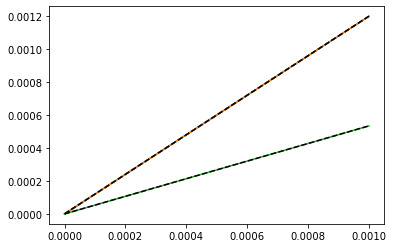

In [62]:
def interp_plot(i,prob):
    y = prob[i,:]
    z = np.polyfit(pc_list,y, 1) 
    print(i, z)
    plt.plot(pc_list,y)
    plt.plot(pc_list,z[0]*pc_list+z[1],"k--")


plt.figure()
# interp_plot(0,P_tot)
interp_plot(1,P_tot)
interp_plot(2,P_tot)
interp_plot(3,P_tot)

plt.show()

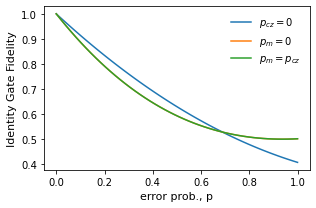

In [69]:
fsize = 11
plt.figure(figsize=(4.5,3))
plt.plot(pc_list,1-inFid_m,"-", color="C0", label="$p_{cz} =0$")
plt.plot(pc_list,1-inFid_cz,"-", color="C1",label="$p_m =0$")
plt.plot(pc_list,1-inFid_mcz,"-", color="C2", label="$p_m =p_{cz}$")


plt.legend(frameon=False)
plt.xlabel("error prob., p",fontsize=fsize)
plt.ylabel("Identity Gate Fidelity",fontsize=fsize)
plt.tight_layout()       
# plt.savefig("figs/dv_id_fidelity.pdf")
plt.show()

## hadamard

In [3]:

def hadamard_err_prob_new(p_c,P_m):
    P_h = np.zeros(4) # I, X, Z, Y
    for i_1 in range(8):
        vec_x = np.zeros((4,5),dtype=int)
        vec_z = np.zeros((4,5),dtype=int)
        vec_x[0,0:2], vec_z[0,0:2], p1 = cz_err_model(p_c,i_1)
        for i_2 in range(8):
            vec_x[1,1:3], vec_z[1,1:3], p2 = cz_err_model(p_c,i_2)
            for i_3 in range(8):
                vec_x[2,2:4], vec_z[2,2:4], p3 = cz_err_model(p_c,i_3)
                for i_4 in range(8):
                    vec_x[3,3:5], vec_z[3,3:5], p4 = cz_err_model(p_c,i_4)
                    vec_x_sum = np.sum(vec_x,axis=0) % 2
                    vec_z_sum = np.sum(vec_z,axis=0) % 2
                    for i_0 in range(4):                        
                        xcomp = (np.sum(vec_z_sum[[0,2,3]])+ np.sum(vec_x_sum[[2,3,4]])+ (i_0%2) )%2
                        zcomp = ( np.sum(vec_z_sum[[1,2,4]])+np.sum(vec_x_sum[[1,2]])+ int(i_0/2) )%2

                        P_h[2*zcomp+xcomp] += P_m[i_0]*p1*p2*p3*p4
    return P_h

# incorrect
def hadamard_err_prob(p_c,P_m):
    P_h = np.zeros(4) # I, X, Z, Y
    for i_1 in range(8):
        vec_x = np.zeros(5,dtype=int)
        vec_z = np.zeros(5,dtype=int)
        vx, vz, p1 = cz_err_model(p_c,i_1)
        vec_x[0:2] += vx
        vec_z[0:2] += vz
        for i_2 in range(8):
            vx, vz, p2 = cz_err_model(p_c,i_2)
            vec_x[1:3] += vx
            vec_z[1:3] += vz
            for i_3 in range(8):
                vx, vz, p3 = cz_err_model(p_c,i_3)
                vec_x[2:4] += vx
                vec_z[2:4] += vz
                for i_4 in range(8):
                    vx, vz, p4 = cz_err_model(p_c,i_4)
                    vec_x[3:5] += vx
                    vec_z[3:5] += vz

                    for i_0 in range(4):                        
                        xcomp = (np.sum(vec_z[[0,2,3]])+ np.sum(vec_x[[2,3,4]])+ (i_0%2) )%2
                        zcomp = ( np.sum(vec_z[[1,2,4]])+np.sum(vec_x[[1,2]])+ int(i_0/2) )%2

                        P_h[2*zcomp+xcomp] += P_m[i_0]*p1*p2*p3*p4

    return P_h
# pc_list = np.linspace(0,0.001,10)
pc_list = np.linspace(0.0,0.5,50)
P_m = np.zeros(4)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_m in enumerate(pc_list):
    p_flip = 2*p_m/3
    p_c = 0
    P_m[0] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
    P_m[1] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
    P_m[2] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_m[3] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_tot[:,i_p] = hadamard_err_prob_new(p_c,P_m)
inFid_m = 2/3*np.sum(P_tot[1:,:],axis=0)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    p_flip = 0
    # p_flip = 2*p_c/3
    P_m[0] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
    P_m[1] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
    P_m[2] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_m[3] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_tot[:,i_p] = hadamard_err_prob_new(p_c,P_m)
inFid_cz = 2/3*np.sum(P_tot[1:,:],axis=0)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    p_flip = 2*p_c/3
    P_m[0] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
    P_m[1] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
    P_m[2] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_m[3] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_tot[:,i_p] = hadamard_err_prob_new(p_c,P_m)
inFid_mcz = 2/3*np.sum(P_tot[1:,:],axis=0)


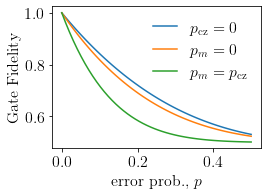

In [16]:
fsize = 16
font_name = "Times New Roman"
plt.figure(figsize=(4,3))
plt.rcParams['font.size'] = '%d' % (fsize)
plt.rc('text', usetex=True )
plt.rc('font', family=font_name, weight='normal', size=fsize)
plt.rcParams["mathtext.fontset"] = "stix"
plt.plot(pc_list,1-inFid_m,"-", color="C0", label=r"$p_{\rm cz} =0$")
plt.plot(pc_list,1-inFid_cz,"-", color="C1",label=r"$p_m =0$")
plt.plot(pc_list,1-inFid_mcz,"-", color="C2", label=r"$p_m =p_{\rm cz}$")


plt.legend(frameon=False,fontsize=fsize,handlelength=1.5)
plt.xlabel("error prob., $p$",fontsize=fsize)
plt.ylabel("Gate Fidelity",fontsize=fsize)
plt.tight_layout()       
plt.savefig("figs/dv_hadamard_fidelity.pdf")
plt.show()

1 [2.39040173e+00 1.42092383e-06]
2 [1.72834490e+00 7.38645977e-07]
3 [1.72834490e+00 7.38645977e-07]


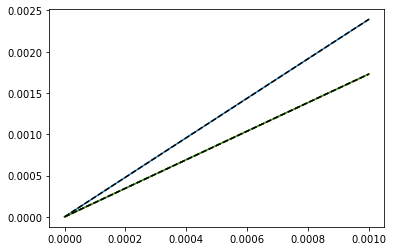

In [111]:
def interp_plot(i,prob):
    y = prob[i,:]
    z = np.polyfit(pc_list,y, 1) 
    print(i, z)
    plt.plot(pc_list,y)
    plt.plot(pc_list,z[0]*pc_list+z[1],"k--")

plt.figure()
# interp_plot(0,P_tot)
interp_plot(1,P_tot)
interp_plot(2,P_tot)
interp_plot(3,P_tot)

plt.show()

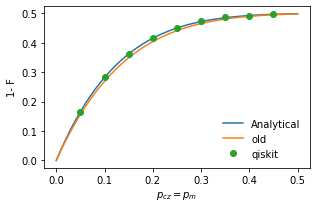

In [75]:
# inFid_mcz = 2/3*np.sum(P_tot[1:,:],axis=0)
plt.figure(figsize=(4.5,3))
plt.plot(pc_list,inFid_mcz,"-", label="Analytical")
plt.plot(pc_list,inFid_cz,"-", label="old")

pc_list_qiskit = np.arange(1,10,1)*0.05
inFid_qiskit = np.array([0.16558203, 0.2837793 , 0.36087891, 0.41582031, 0.45040625,
       0.47344922, 0.48580273, 0.49178125, 0.49641211])

plt.plot(pc_list_qiskit,inFid_qiskit,"o", label="qiskit")

# z = np.polyfit(pc_list, inFid, 1) 
# print(z)
# plt.plot(pc_list,z[0]*pc_list+z[1],"k--")

plt.legend(frameon=False)
plt.xlabel(r"$p_{cz}=p_m$")
plt.ylabel("1- F")
plt.tight_layout()       
# plt.savefig("figs/hadamard_comparison.pdf")
plt.show()

In [276]:
## cz Monte-Carlo version
"""
0----1----2----3----4
"""

pc_list = np.linspace(0,0.5,50)

p_flip = 2*pc_list/3
P_m = np.zeros((4,len(p_flip)))  # I, X, Z, Y
P_m[0,:] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
P_m[1,:] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
P_m[2,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
P_m[3,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)

Niter= 1000
P_tot_mc = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    weights = np.concatenate(([1-14/15*p_c],np.ones(7)*2/15*p_c))
    for i_iter in range(Niter):
        vec_x = np.zeros(5,dtype=int)
        vec_z = np.zeros(5,dtype=int)

        for i_l in range(4):
            i_1 = np.random.choice(8, 1, p=weights)
            # vx, vz = cz_err_gen(p_c,i_1)
            # vec_x[i_l:i_l+2] += vx
            # vec_z[i_l:i_l+2] += vz
            cz_err_gen(i_1,i_l,i_l+1,vec_x,vec_z)
            
        for i_0 in range(4):                        
            xcomp = (vec_z[0]+ vec_x[2] + vec_z[2] + vec_x[3] + vec_z[3] + vec_x[4]+ (i_0%2) )%2
            zcomp = (vec_x[1] + vec_z[1] + vec_x[2] + vec_z[2] + vec_z[4]+ int(i_0/2) )%2

            P_tot_mc[2*zcomp+xcomp,i_p] += P_m[i_0,i_p]
            
P_tot_mc /= Niter

In [318]:
## full Monte-Carlo version
"""
0----1----2----3----4
"""

# pc_list = np.linspace(0,0.5,50)

Niter= 1000
P_tot_mc = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    p_m = p_c
    weights_cz = np.concatenate(([1-14/15*p_c],np.ones(7)*2/15*p_c))
    weights_single_qubit = np.array([1-p_m,p_m/3,p_m/3,p_m/3]) # I, X, Z, Y

    for i_iter in range(Niter):
        vec_x = np.zeros(5,dtype=int)
        vec_z = np.zeros(5,dtype=int)

        for i_l in range(4):
            i_1 = np.random.choice(8, 1, p=weights_cz)
            cz_err_gen(i_1,i_l,i_l+1,vec_x,vec_z)
            
            err_q = np.random.choice(4, 1, p=weights_single_qubit)
            vec_x[i_l] += (err_q%2)
            vec_z[i_l] += int(err_q/2)

        xcomp = (vec_z[0]+ vec_x[2] + vec_z[2] + vec_x[3] + vec_z[3] + vec_x[4] )%2
        zcomp = (vec_x[1] + vec_z[1] + vec_x[2] + vec_z[2] + vec_z[4] )%2

        P_tot_mc[2*zcomp+xcomp,i_p] += 1
            
P_tot_mc /= Niter

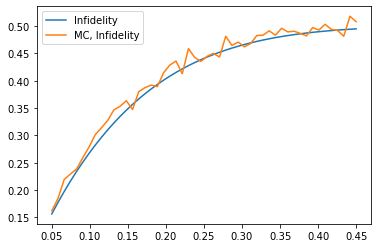

In [319]:
# for i_l in range(1,4):
# #     plt.plot(pc_list,P_tot[i_l,:])
# plt.plot(pc_list,P_tot[1,:],"-",label="X err")
# plt.plot(pc_list,P_tot[2,:],"-",label="Z err")
# plt.plot(pc_list,P_tot[3,:],"-",label="Y err")

# plt.plot(pc_list,P_tot_mc[1,:],".",label="MC, X err")
# plt.plot(pc_list,P_tot_mc[2,:],"x",label="MC, Z err")
# plt.plot(pc_list,P_tot_mc[3,:],".",label="MC,Y err")



# # # # plt.plot(pc_list,np.sum(p_tot[0:,:],axis=0))
inFid = 2/3*np.sum(P_tot[1:,:],axis=0)
plt.plot(pc_list,inFid,"-", label="Infidelity")

inFid_mc = 2/3*np.sum(P_tot_mc[1:,:],axis=0)
plt.plot(pc_list,inFid_mc,"-", label="MC, Infidelity")

# plt.plot(pc_list,(28/15+4*(2/3)**2)*pc_list,"k--",label="linear fit")
# plt.ylim(0,0.52)
# # # plt.xlim(0,0.001)
# # plt.xlabel(r"$p_{cz}=p_m$")
# # # plt.ylabel("1-Fidelity")
# plt.yscale("log")
plt.legend()
plt.show()


## phase gate

In [98]:

def sgate_err_prob_new(p_c,P_m):
    P_h = np.zeros(4) # I, X, Z, Y
    for i_1 in range(8):
        vec_x = np.zeros((4,5),dtype=int)
        vec_z = np.zeros((4,5),dtype=int)
        vec_x[0,0:2], vec_z[0,0:2], p1 = cz_err_model(p_c,i_1)
        for i_2 in range(8):
            vec_x[1,1:3], vec_z[1,1:3], p2 = cz_err_model(p_c,i_2)
            for i_3 in range(8):
                vec_x[2,2:4], vec_z[2,2:4], p3 = cz_err_model(p_c,i_3)
                for i_4 in range(8):
                    vec_x[3,3:5], vec_z[3,3:5], p4 = cz_err_model(p_c,i_4)
                    vec_x_sum = np.sum(vec_x,axis=0) % 2
                    vec_z_sum = np.sum(vec_z,axis=0) % 2
                    for i_0 in range(4):                        
                        xcomp = (np.sum(vec_z_sum[[1,3]])+ vec_x_sum[4] + (i_0%2) )%2
                        zcomp = ( np.sum(vec_z_sum[[0,1,2,4]])+vec_x_sum[2]+ int(i_0/2) )%2

                        P_h[2*zcomp+xcomp] += P_m[i_0]*p1*p2*p3*p4
    return P_h

pc_list = np.linspace(0,0.001,10)
# pc_list = np.linspace(0.0,0.5,50)
P_m = np.zeros(4)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_m in enumerate(pc_list):
    p_flip = 2*p_m/3
    p_c = 0
    P_m[0] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
    P_m[2] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
    P_m[1] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_m[3] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_tot[:,i_p] = sgate_err_prob_new(p_c,P_m)
inFid_m = 2/3*np.sum(P_tot[1:,:],axis=0)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    p_flip = 0
    # p_flip = 2*p_c/3
    P_m[0] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
    P_m[2] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
    P_m[1] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_m[3] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_tot[:,i_p] = sgate_err_prob_new(p_c,P_m)
inFid_cz = 2/3*np.sum(P_tot[1:,:],axis=0)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    p_flip = 2*p_c/3
    P_m[0] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
    P_m[2] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
    P_m[1] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_m[3] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
    P_tot[:,i_p] = sgate_err_prob_new(p_c,P_m)
inFid_mcz = 2/3*np.sum(P_tot[1:,:],axis=0)

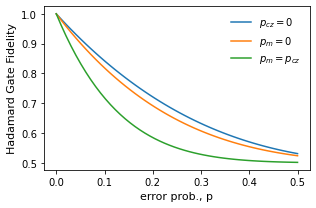

In [97]:
fsize = 11
plt.figure(figsize=(4.5,3))
plt.plot(pc_list,1-inFid_m,"-", color="C0", label="$p_{cz} =0$")
plt.plot(pc_list,1-inFid_cz,"-", color="C1",label="$p_m =0$")
plt.plot(pc_list,1-inFid_mcz,"-", color="C2", label="$p_m =p_{cz}$")


plt.legend(frameon=False)
plt.xlabel("error prob., p",fontsize=fsize)
plt.ylabel("Hadamard Gate Fidelity",fontsize=fsize)
plt.tight_layout()       
plt.savefig("figs/dv_sgate_fidelity.pdf")
plt.show()

1 [1.72834490e+00 7.38645977e-07]
2 [2.39040173e+00 1.42092383e-06]
3 [1.72834490e+00 7.38645977e-07]


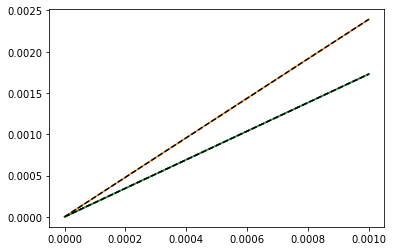

In [99]:
def interp_plot(i,prob):
    y = prob[i,:]
    z = np.polyfit(pc_list,y, 1) 
    print(i, z)
    plt.plot(pc_list,y)
    plt.plot(pc_list,z[0]*pc_list+z[1],"k--")

plt.figure()
# interp_plot(0,P_tot)
interp_plot(1,P_tot)
interp_plot(2,P_tot)
interp_plot(3,P_tot)
plt.show()

## CNOT

In [261]:

def cz37_err_gen(err,v_x,v_z):
    if err == 1:
        v_z[[2,7]] += 1
    elif err == 2:
        v_z[[2,3,7]] += 1
    elif err == 3:
        v_z[3] += 1
    elif err == 4:
        v_z[7] += 1
    elif err == 5:
        v_z[2] += 1
    elif err == 6:
        v_z[[2,3]] += 1
    elif err == 7:
        v_z[[3,7]] += 1
    return 0

"""
X0----Y1----Y2----Y3----Y4-----Y5-----6
                  |
                  Y7
                  |
X8----X9---X10---Y11----X12----X13-----14
"""

Xinds_z_c = [2,3,4,7]
Zinds_z_c = [0,2,3,4,7,8,10]
inds_x_c = [1,2,4,5]
inds_z_t = [8,10,12]
Xinds_x_t = [1,2,7,11]
Zinds_x_t = [1,2,7,9,11,13]

## Monte-Carlo version
pc_list = np.linspace(0,0.5,50)

## for errors in measurement apparatus
def Hilbertspace_Zr(N,r):
    states=np.zeros((r**N,N),dtype=int)
    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states
Nq = 14
vec = Hilbertspace_Zr(Nq,2)
###

Niter= 100
P_tot_mc = np.zeros((16,len(pc_list))) 
for i_p, p_c in enumerate(pc_list):
    weights = np.concatenate(([1-14/15*p_c],np.ones(7)*2/15*p_c))
    p_flip = 2/3*p_c
    p_vec = p_flip**np.arange(15)*(1-p_flip)**np.arange(14,-1,-1)

    for i_iter in range(Niter):
        vec_x = np.zeros(15,dtype=int)
        vec_z = np.zeros(15,dtype=int)

        for i_l in range(14):
            i_1 = np.random.choice(8, 1, p=weights)
            if i_l <= 5 or i_l >= 8: # lower/upper rung
                cz_err_gen(i_1,i_l,i_l+1,vec_x,vec_z)
            elif i_l == 6: # 3-7
                cz37_err_gen(i_1,vec_x,vec_z)
            elif i_l == 7: # 7-11
                cz_err_gen(i_1,7,11,vec_x,vec_z)

        sz_c = np.sum(vec_x[Xinds_z_c]) + np.sum(vec_z[Zinds_z_c])
        sx_c = np.sum(vec_x[inds_x_c]) + np.sum(vec_z[inds_x_c])
        sz_t = np.sum(vec_z[inds_z_t])
        sx_t = np.sum(vec_x[Xinds_x_t]) + np.sum(vec_z[Zinds_x_t])
        
        for i in range(2**Nq):
            s_flip=vec[i,:]    
            sz_c += np.sum(vec[i,Zinds_z_c])
            sx_c += np.sum(vec[i,inds_x_c])
            sz_t += np.sum(vec[i,inds_z_t])
            sx_t += np.sum(vec[i,Zinds_x_t])
            p_exp = np.sum(vec[i,:])

            i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))

            P_tot_mc[i_e,i_p] += p_vec[p_exp]
            
P_tot_mc /= Niter

In [268]:
## single qubit exact

Xinds_z_c = [2,3,4,7]
Zinds_z_c = [0,2,3,4,7,8,10]
inds_x_c = [1,2,4,5]
inds_z_t = [8,10,12]
Xinds_x_t = [1,2,7,11]
Zinds_x_t = [1,2,7,9,11,13]

pm_list = np.linspace(0,0.5,50)

## for errors in measurement apparatus
def Hilbertspace_Zr(N,r):
    states=np.zeros((r**N,N),dtype=int)
    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states
Nq = 14
vec = Hilbertspace_Zr(Nq,2)
###

err_vec = np.zeros((16,Nq+1),dtype=int)

for i in range(2**Nq):
    s_flip=vec[i,:]    
    sz_c = np.sum(vec[i,[0,2,3,4,7,8,10]])
    sx_c = np.sum(vec[i,[1,2,4,5]])
    sz_t = np.sum(vec[i,[8,10,12]])
    sx_t = np.sum(vec[i,[1,2,7,9,11,13]])
    p_exp = np.sum(vec[i,:])
    i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
    err_vec[i_e,p_exp] += 1
    
P_tot_ex = np.zeros((16,len(pm_list))) 
for i_p, p_m in enumerate(pm_list):
    p_flip = 2/3*p_m
    p_vec = p_flip**np.arange(15)*(1-p_flip)**np.arange(14,-1,-1)
    P_tot_ex[:,i_p] = err_vec @ p_vec


## DV full Monte Carlo

In [272]:
"""
X0----Y1----Y2----Y3----Y4-----Y5-----6
                  |
                  Y7
                  |
X8----X9---X10---Y11----X12----X13-----14
"""

Xinds_z_c = [2,3,4,7]
Zinds_z_c = [0,2,3,4,7,8,10]
inds_x_c = [1,2,4,5]
inds_z_t = [8,10,12]
Xinds_x_t = [1,2,7,11]
Zinds_x_t = [1,2,7,9,11,13]

pc_list = np.linspace(0,0.5,50)

Niter= 1000
P_tot_mc = np.zeros((16,len(pc_list))) 
for i_p, p_c in enumerate(pc_list):
    p_m = p_c
    # p_c = 0
    weights_cz = np.concatenate(([1-14/15*p_c],np.ones(7)*2/15*p_c))
    weights_single_qubit = np.array([1-p_m,p_m/3,p_m/3,p_m/3]) # I, X, Z, Y

    for i_iter in range(Niter):
        vec_x = np.zeros(15,dtype=int)
        vec_z = np.zeros(15,dtype=int)

        for i_l in range(14):
            # err_cz = np.random.choice(8, 1, p=weights_cz)
            # if i_l <= 5 or i_l >= 8: # lower/upper rung
            #     cz_err_gen(err_cz,i_l,i_l+1,vec_x,vec_z)
            # elif i_l == 6: # 3-7
            #     cz37_err_gen(err_cz,vec_x,vec_z)
            # elif i_l == 7: # 7-11
            #     cz_err_gen(err_cz,7,11,vec_x,vec_z)

            err_q = np.random.choice(4, 1, p=weights_single_qubit)
            vec_x[i_l] += (err_q%2)
            vec_z[i_l] += int(err_q/2)
                
        sz_c = np.sum(vec_x[Xinds_z_c]) + np.sum(vec_z[Zinds_z_c])
        sx_c = np.sum(vec_x[inds_x_c]) + np.sum(vec_z[inds_x_c])
        sz_t = np.sum(vec_z[inds_z_t])
        sx_t = np.sum(vec_x[Xinds_x_t]) + np.sum(vec_z[Zinds_x_t])
        
        i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
        P_tot_mc[i_e,i_p] += 1
            
P_tot_mc /= Niter

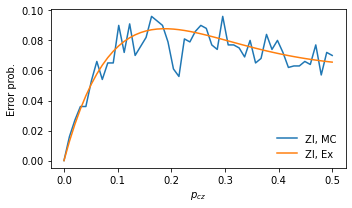

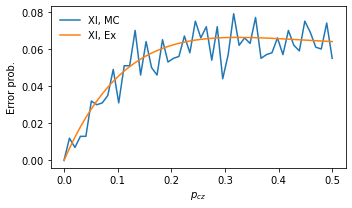

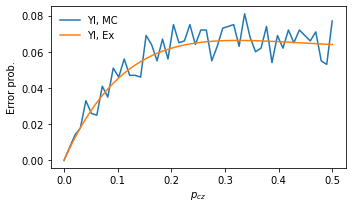

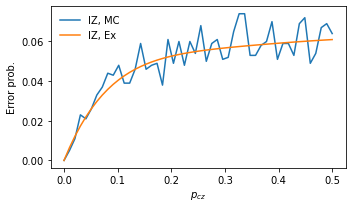

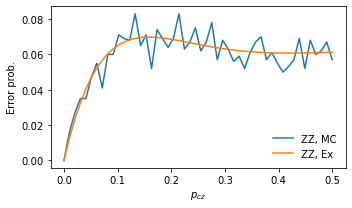

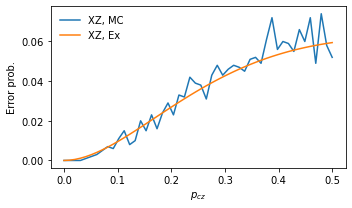

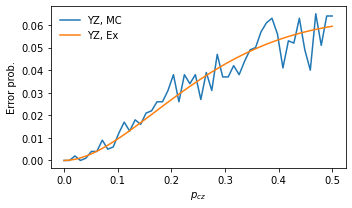

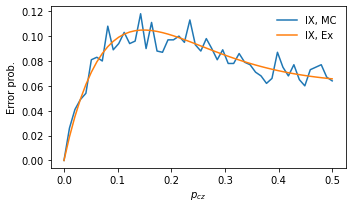

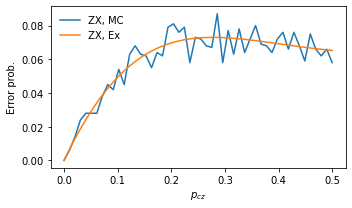

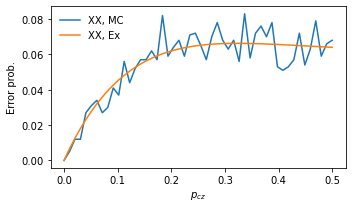

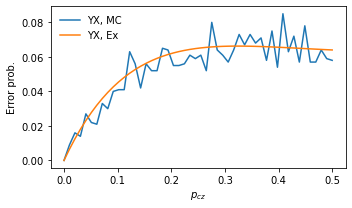

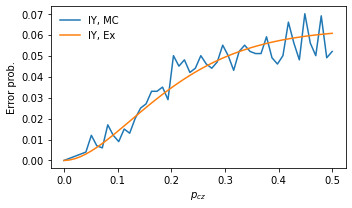

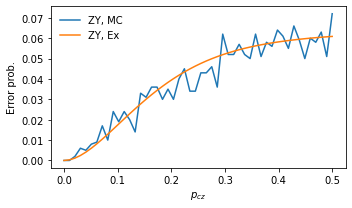

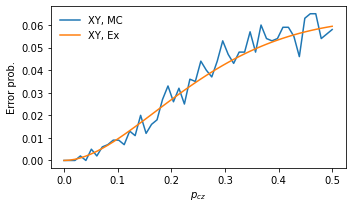

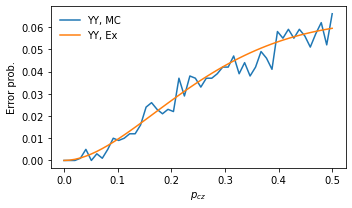

In [273]:
err_list={0: 'II', 1: 'ZI', 2: 'XI', 3: 'YI', 4: 'IZ', 5: 'ZZ', 6: 'XZ',\
          7: 'YZ', 8: 'IX', 9: 'ZX', 10: 'XX', 11: 'YX', 12: 'IY',\
          13: 'ZY', 14: 'XY', 15: 'YY'}

# plt.figure(1,figsize=(5,3))
# [Z_c,X_c,Z_t,X_t] # numbering scheme    
for i_xx in np.arange(1,16):
# for i_xx in [8,6]:
    plt.figure(i_xx,figsize=(5,3))
    plt.plot(pc_list,P_tot_mc[i_xx,:],"-", label=err_list[i_xx]+", MC")#, color="C%d" % (i_xx)
    plt.plot(pm_list,P_tot_ex[i_xx,:],"-", label=err_list[i_xx]+", Ex")#, color="C%d" % (i_xx)

    # plt.xlim(4,31)
    plt.xlabel(r"$p_{cz}$")
    plt.ylabel("Error prob.")
    # plt.grid()
    plt.legend(frameon=False,markerscale=2)
    plt.tight_layout()
    # plt.grid()
    # plt.savefig("figs/cnot_err_%s.pdf" % err_list[i_xx])
    plt.show()